<a href="https://colab.research.google.com/github/Showcas/NLP/blob/main/03_1_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with LLMs

## 03 - Word Vectors (Gensim Example)

---

# Gensim Word Vector Visualization of Various Word Vectors

In [4]:
## Install gensim
## make shure to restart the runtime after installing gensim
!pip install "gensim>=4.0.0"

!pip install plotly
!pip install nbformat


In [5]:
import spacy
import gensim

If not already available through Notebooks 1–4, the **en_core_web_sm** model must be downloaded first.

In [6]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
NLP = spacy.load("en_core_web_sm")

In [8]:
import logging

logging.basicConfig(
    format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO
)

## Generate our own w2v model/s

Before we get started, we need two example texts that differ significantly both in content and language for better illustration:

In [9]:
!wget \
    -qO "shakespeare.txt" \
    "https://drive.switch.ch/index.php/s/EDiUD2YECYTpaLO/download"

## If you run this locally on windows, you might need to use the following command
# curl -o shakespeare.txt "https://drive.switch.ch/index.php/s/EDiUD2YECYTpaLO/download"


In [10]:
!wget \
    -qO "lovecraft.txt" \
    "https://drive.switch.ch/index.php/s/jMKWlZdDgHdLv3B/download"

## If you run this locally on windows, you might need to use the following command
# curl -o lovecraft.txt "https://drive.switch.ch/index.php/s/jMKWlZdDgHdLv3B/download"


Next, we define a corpus generator, which serves as a tool for preprocessing and tokenizing a text corpus specifically for Gensim Word Vector Visualization. This generator operates by reading a text file incrementally, line by line, to ensure memory efficiency. It processes the text in manageable batches, applies tokenization and lemmatization techniques, and yields sentences as tokenized lists of words.

In [11]:
class CorpusGenerator:
    """
    A generator class to preprocess and tokenize a text corpus for Gensim Word Vector Visualization.
    It reads a text file line by line, processes the text in batches, and yields tokenized sentences.
    """

    BUFFER_SIZE = 10_000

    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        """
        Generator function to read, process, and tokenize lines from the text file.
        Yields:
            list of str: Tokenized and lemmatized sentences from the text file.
        """
        buffer = []
        with open(self.filename, "r") as f:
            for line in f:
                if not (line := line.strip()):
                    continue
                buffer.append(line)
                if len(buffer) >= self.BUFFER_SIZE:
                    yield from self._process_buffer(buffer)
                    buffer = []
        yield from self._process_buffer(buffer)

    def _process_buffer(self, buffer):
        """
        Processes a batch of lines using an NLP pipeline to tokenize, lemmatize, and filter sentences.
        Args:
            buffer (list of str): A batch of lines to process.

        Yields:
            list of str: Tokenized and lemmatized words for each sentence.
        """
        for doc in NLP.pipe(buffer):
            for sent in doc.sents:
                tokens = [
                    token.lemma_.lower()
                    for token in sent
                    if not token.is_punct and token.is_alpha
                ]
                if tokens:
                    yield tokens


In [12]:
c = CorpusGenerator("lovecraft.txt")

for i, doc in enumerate(c):
    print(doc)
    if i > 10:
        break

['the', 'nameless', 'city']
['when', 'i', 'draw', 'nigh', 'the', 'nameless', 'city', 'i', 'know', 'it', 'be', 'accurse']
['i', 'be', 'travel', 'in', 'a', 'parched', 'and', 'terrible', 'valley', 'under', 'the', 'moon', 'and', 'afar', 'i', 'see', 'it', 'protrude', 'uncannily', 'above', 'the', 'sand', 'as', 'part', 'of', 'a', 'corpse', 'may', 'protrude', 'from', 'an', 'ill', 'make', 'grave']
['fear', 'speak', 'from', 'the', 'age', 'wear', 'stone', 'of', 'this', 'hoary', 'survivor', 'of', 'the', 'deluge', 'this', 'great', 'grandfather', 'of', 'the', 'eld', 'pyramid', 'and', 'a', 'viewless', 'aura', 'repel', 'i', 'and', 'bade', 'i', 'retreat', 'from', 'antique', 'and', 'sinister', 'secret', 'that', 'no', 'man', 'should', 'see', 'and', 'no', 'man', 'else', 'have', 'dare', 'to', 'see']
['remote', 'in', 'the', 'desert', 'of', 'araby', 'lie', 'the', 'nameless', 'city', 'crumbling', 'and', 'inarticulate', 'its', 'low', 'wall', 'nearly', 'hide', 'by', 'the', 'sand', 'of', 'uncounted', 'age']
['it

## Shakespear Word2Vec

Now we use `gensim.models.Word2Vec` to train a word embedding, i.e. a vector representation of each word, for the shakespear text. The CorpusGenerator implemented above is used for this.

In [13]:
dsm_shakespeare = gensim.models.Word2Vec(
    sentences=CorpusGenerator("shakespeare.txt"),
    vector_size=50,
    min_count=3,
)

Now we can output the vectors according to their similarity and thus analyze the logic trained in the model. Words with a high similarity value should also be closely related to each other:

In [14]:
# The most similar words to "death"
dsm_shakespeare.wv.most_similar("death")

[('blood', 0.9934951663017273),
 ('arm', 0.9912146329879761),
 ('law', 0.9895414113998413),
 ('book', 0.9893046617507935),
 ('justice', 0.9888473749160767),
 ('cut', 0.9885690808296204),
 ('person', 0.9885568022727966),
 ('loss', 0.9884696006774902),
 ('old', 0.9883304238319397),
 ('number', 0.9880102276802063)]

In [15]:
# the least similar words to "love"
dsm_shakespeare.wv.most_similar(negative=["death"])

[('sampson', 0.10280045121908188),
 ('ferdinand', -0.026599755510687828),
 ('alonso', -0.05126956105232239),
 ('dorca', -0.09800080955028534),
 ('ben', -0.09952498227357864),
 ('archidamus', -0.1012946143746376),
 ('brutus', -0.29845303297042847),
 ('balthasar', -0.3242345452308655),
 ('resteth', -0.33129745721817017),
 ('adrian', -0.3963117301464081)]

Or we can calculate the similarity between two words:

In [16]:
dsm_shakespeare.wv.similarity("love", "hate")

0.9485772

In [17]:
dsm_shakespeare.wv.similarity("love", "death")

0.86453235

In [18]:
dsm_shakespeare.wv.similarity("hate", "death")

0.95425993

## Lovecraft Word2Vec

We do the same again with Lovecraft's text corpus to get a vector embedding for this text as well:

In [19]:
dsm_lovecraft = gensim.models.Word2Vec(
    sentences=CorpusGenerator("lovecraft.txt"),
    vector_size=50,
    min_count=3,
)

In [20]:
dsm_lovecraft.wv.most_similar("death")

[('record', 0.9820548295974731),
 ('official', 0.9794835448265076),
 ('sign', 0.978946328163147),
 ('terror', 0.9768235087394714),
 ('wake', 0.9763450622558594),
 ('mine', 0.9759358763694763),
 ('month', 0.9748551249504089),
 ('curwen', 0.9745578169822693),
 ('impression', 0.9739648103713989),
 ('reality', 0.973513662815094)]

In [21]:
dsm_lovecraft.wv.similarity("love", "hate")

0.9473637

In [22]:
dsm_lovecraft.wv.similarity("love", "death")

0.9129958

In [23]:
dsm_lovecraft.wv.similarity("hate", "death")

0.9075188

## Plotting the model

We use *Principal Component Analysis (PCA)* for dimensionality reduction: $ 50 \rightarrow 2 $

-> [PCA auf Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [24]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [25]:
# define the size of the plots for better readability
PLOT_SIZE_X = 7
PLOT_SIZE_Y = 7

In [26]:
def display_pca_scatterplot(model_1, words_1=None, model_2=None, words_2=None):
    """
    Plots a 2D scatter plot of word embeddings from one or two Word2Vec models using PCA for dimensionality reduction.

    Args:
        model_1 (gensim.models.Word2Vec): The first Word2Vec model to visualize.
        words_1 (list of str, optional): Words to visualize from model_1.
        model_2 (gensim.models.Word2Vec, optional): The second Word2Vec model to compare with model_1.
        words_2 (list of str, optional): Words to visualize from model_2.
    """
    pca = PCA(n_components=2)
    pca.fit(model_1.vectors)

    if words_1 is None:
        words_1 = model_1.index_to_key

    word_vectors_1 = np.array([model_1[w] for w in words_1])
    words_1 = [word for word in words_1 if word in model_1]
    vectors_1 = np.array([model_1[word] for word in words_1])
    reduced_1 = pca.transform(vectors_1)

    plt.figure(figsize=(PLOT_SIZE_X, PLOT_SIZE_Y))
    plt.scatter(reduced_1[:, 0], reduced_1[:, 1], edgecolors="k", c="r")
    for word, (x, y) in zip(words_1, reduced_1):
        plt.text(x + 0.01, y + 0.01, word)

    # add lables
    plt.xlabel("PCA Dimension 1")
    plt.ylabel("PCA Dimension 2")
    plt.title("Word Embedding PCA Visualization")

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)

    if model_2 is not None and words_2 is not None:
        word_vectors_2 = np.array([model_1[w] for w in words_2])
        words_2 = [word for word in words_2 if word in model_2]
        vectors_2 = np.array([model_2[word] for word in words_2])
        reduced_2 = pca.transform(vectors_2)
        plt.scatter(reduced_2[:, 0], reduced_2[:, 1], edgecolors="k", c="b")
        for word, (x, y) in zip(words_2, reduced_2):
            plt.text(x + 0.01, y + 0.01, word)


    plt.show()

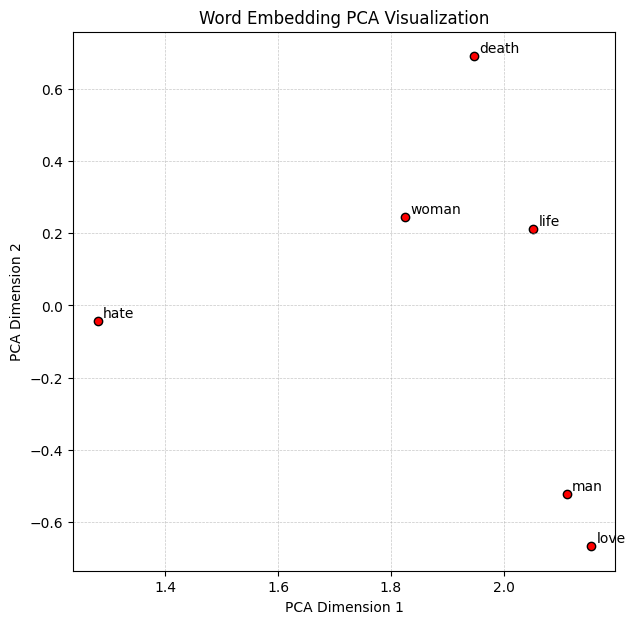

In [27]:
display_pca_scatterplot(dsm_shakespeare.wv, ["love", "hate", "death", "life", "man", "woman"])

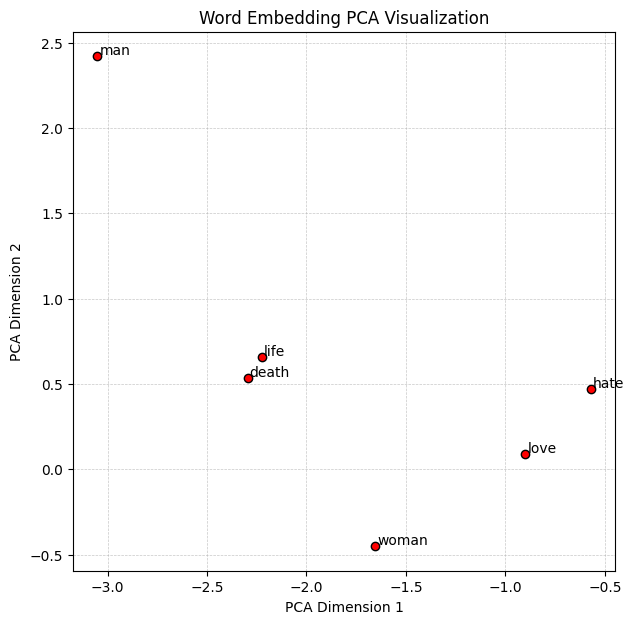

In [28]:
display_pca_scatterplot(dsm_lovecraft.wv, ["love", "hate", "death", "life", "man", "woman"])

The different embeddings and thus the different meanings of the words become particularly apparent when the two plots are combined:

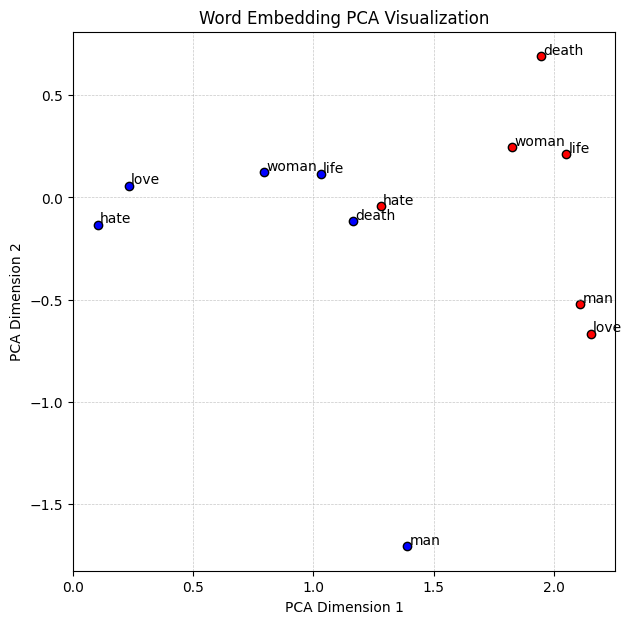

In [29]:
display_pca_scatterplot(
    model_1=dsm_shakespeare.wv,
    words_1=["love", "hate", "death", "life", "man", "woman"],
    model_2=dsm_lovecraft.wv,
    words_2=["love", "hate", "death", "life", "man", "woman"],
)

#### TASK 3.1
Lets see what the whole vocabulary looks in a 2D PCA representation: Implement a function to plot the whole vocabulary in a 2D PCA representation.
1. Use the `PCA` from `sklearn.decomposition`to create the 2D PCA
2. Use matplotlib for the plot (`matplotlib.pyplot` as `plt`).


**Bonus:** *Add the labels of the words to the most extreme words in the 2D PCA representation. (max PCA Dimension 1, min PCA Dimension 1 and max PCA Dimension 2 and min PCA Dimension 2)*



In [36]:
def plot_whole_vocab_2d_pca(model):
    ### IMPLEMENT YOUR SOLUTION HERE ###
    pca = PCA(n_components=2)
    words = model.index_to_key
    word_vectors = np.array([model[word] for word in words])
    reduced_vectors = pca.fit_transform(word_vectors)

    plt.figure(figsize=(PLOT_SIZE_X, PLOT_SIZE_Y))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', c='r', alpha=0.7)
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.title('Whole Vocabulary PCA Visualization')
    plt.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)

    max_x_idx = np.argmax(reduced_vectors[:, 0])
    min_x_idx = np.argmin(reduced_vectors[:, 0])
    max_y_idx = np.argmax(reduced_vectors[:, 1])
    min_y_idx = np.argmin(reduced_vectors[:, 1])

    extreme_indices = [max_x_idx, min_x_idx, max_y_idx, min_y_idx]
    extreme_labels = ['Max PCA Dim 1', 'Min PCA Dim 1', 'Max PCA Dim 2', 'Min PCA Dim 2']

    for idx, label in zip(extreme_indices, extreme_labels):
        word = words[idx]
        x, y = reduced_vectors[idx]
        plt.scatter(x, y, color='r')
        plt.text(x + 0.01, y + 0.01, f'{label}: {word}', fontsize=9)

    plt.show()

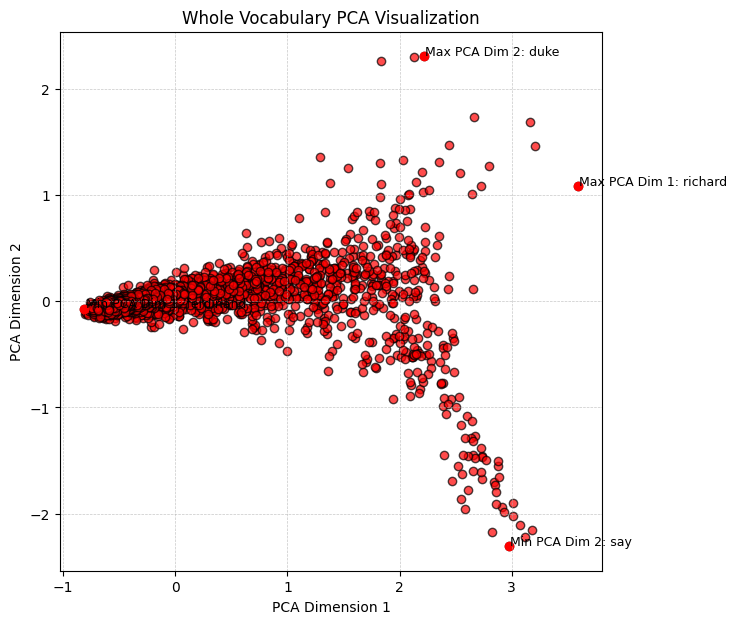

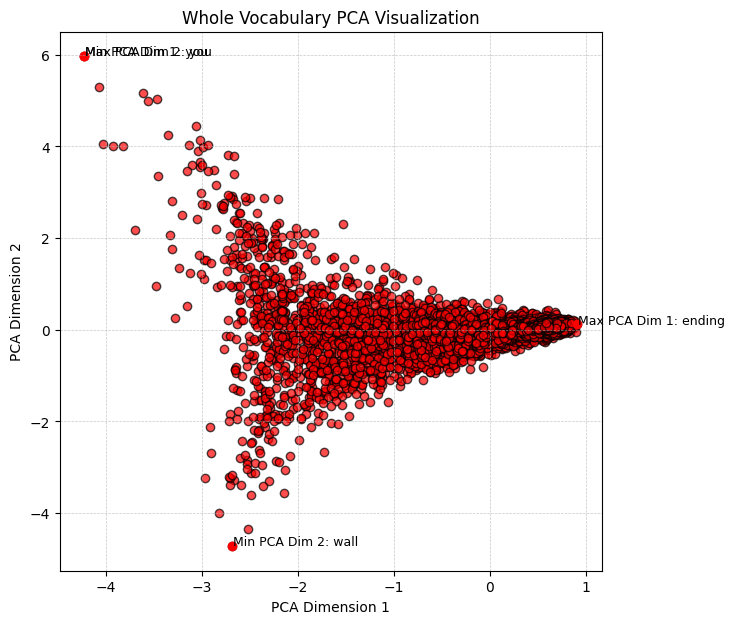

In [37]:
# plot the whole vocabulary of the models
plot_whole_vocab_2d_pca(dsm_shakespeare.wv)
plot_whole_vocab_2d_pca(dsm_lovecraft.wv)

## As 3D scatterplot
Using plotly we can also observe the vocabulary embeddings in a 3D PCA representation.

In [38]:
import plotly.graph_objs as go
from collections import defaultdict

In [39]:
def display_pca_scatterplot_3d(model, words=None, model2=None, words2=None):
    pca = PCA(n_components=3)
    pca.fit(model.vectors)

    if words is None:
        words = model.index_to_key
    else:
        words = [word for word in words if word in model.index_to_key]

    word_vectors = np.array([model[w] for w in words])

    vectors = np.array([model.get_vector(word) for word in words])
    reduced = pca.transform(vectors)

    trace1 = go.Scatter3d(x=reduced[:, 0], y=reduced[:, 1], z=reduced[:, 2],
                          mode='markers+text',
                          marker=dict(color='red', size=5),
                          text=words,
                          textposition='top center')

    data = [trace1]

    if model2 is not None and words2 is not None:
        words2 = [word for word in words2 if word in model2.index_to_key]

        word_vectors2 = np.array([model2[w] for w in words2])
        vectors2 = np.array([model2.get_vector(word) for word in words2])
        reduced2 = pca.transform(vectors2)

        trace2 = go.Scatter3d(x=reduced2[:, 0], y=reduced2[:, 1], z=reduced2[:, 2],
                              mode='markers+text',
                              marker=dict(color='blue', size=5),
                              text=words2,
                              textposition='top center')

        data.append(trace2)

    # add arrows connecting nodes with the same label
    label_positions = defaultdict(list)
    for i, word in enumerate(words + words2):
        try:
            if word in model.index_to_key:
                label_positions[word].append(reduced[i])
        except IndexError:
            pass
    for label, positions in label_positions.items():
        if len(positions) > 1:
            x, y, z = zip(*positions)
            trace = go.Scatter3d(x=x, y=y, z=z,
                                 mode='lines',
                                 line=dict(color='black', width=2),
                                 name=label)
            data.append(trace)

    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0), legend=dict(y=1.1))

    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [40]:
display_pca_scatterplot_3d(
    dsm_shakespeare.wv,
    words=["love", "hate", "death", "life", "man", "woman"],
    model2=dsm_lovecraft.wv,
    words2=["love", "hate", "death", "life", "man", "woman"]
)

# Use a real corpus

In [41]:
import gensim.downloader as api


We download the the GloVe embeddings. This are embeddings that are trained on english Wikipedia with a dimensionality of 100 and 6B tokens.

You can also try out bigger or smaller versions:
- glove-wiki-gigaword-50 (65 MB)
- glove-wiki-gigaword-100 (128 MB)
- glove-wiki-gigaword-200 (252 MB)
- glove-wiki-gigaword-300 (376 MB)

For more Informations on GloVe: https://nlp.stanford.edu/projects/glove/

In [42]:
dsm_glove = api.load("glove-wiki-gigaword-100")  # this will download and load the model

[==================================================] 100.0% 128.1/128.1MB downloaded


We can compare word distances by using the matrix multiplication operator `@`.

In [43]:
dsm_glove["bread"] @ dsm_glove["croissant"]

11.99024

In [44]:
dsm_glove["bread"] @ dsm_glove["butter"]

29.615213

In [45]:
dsm_glove["croissant"]

array([-0.25144  ,  0.52157  , -0.75452  ,  0.28039  , -0.31388  ,
        0.274    ,  1.1971   , -0.10519  ,  0.82544  , -0.33398  ,
       -0.21417  ,  0.22216  ,  0.14982  ,  0.47384  ,  0.41984  ,
        0.69397  , -0.25999  , -0.44414  ,  0.58296  , -0.30851  ,
       -0.076455 ,  0.33468  ,  0.28055  , -0.99012  ,  0.30349  ,
        0.39128  ,  0.031526 , -0.095395 , -0.004745 , -0.81347  ,
        0.27869  , -0.1812   ,  0.14632  , -0.42186  ,  0.13857  ,
        1.139    ,  0.14925  , -0.051459 ,  0.37875  , -0.2613   ,
        0.011081 , -0.28881  , -0.38662  , -0.3135   , -0.1954   ,
        0.19248  , -0.52995  , -0.40674  , -0.25159  ,  0.06272  ,
       -0.32724  ,  0.28374  , -0.2155   , -0.061832 , -0.50134  ,
        0.0093959,  0.30715  ,  0.3873   , -0.74554  , -0.45947  ,
        0.40032  , -0.1378   , -0.26968  , -0.3946   , -0.64876  ,
       -0.47149  , -0.085536 ,  0.092795 , -0.034018 , -0.61906  ,
        0.19123  ,  0.20563  ,  0.29056  , -0.010908 ,  0.1531

In [46]:
dsm_glove.most_similar("croissant")

[('croissants', 0.682984471321106),
 ('brioche', 0.6283302307128906),
 ('baguette', 0.5968103408813477),
 ('focaccia', 0.5876684188842773),
 ('pudding', 0.5803956389427185),
 ('souffle', 0.5614768862724304),
 ('baguettes', 0.5558240413665771),
 ('tortilla', 0.5449503064155579),
 ('pastries', 0.5427731275558472),
 ('calzone', 0.5374532341957092)]

In [47]:
dsm_glove.most_similar("usa")

[('canada', 0.6544384956359863),
 ('america', 0.645224392414093),
 ('u.s.a.', 0.6184033751487732),
 ('united', 0.6017189621925354),
 ('states', 0.5970699191093445),
 ('australia', 0.5838716626167297),
 ('world', 0.5590084195137024),
 ('2010', 0.5580702424049377),
 ('2012', 0.5504006743431091),
 ('davis', 0.5464468002319336)]

In [48]:
dsm_glove.most_similar("banana")

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [49]:
dsm_glove.most_similar("switzerland")

[('austria', 0.7893784642219543),
 ('germany', 0.7793211936950684),
 ('belgium', 0.7573941946029663),
 ('swiss', 0.7425053715705872),
 ('netherlands', 0.7273494601249695),
 ('sweden', 0.7233395576477051),
 ('luxembourg', 0.7225510478019714),
 ('italy', 0.6981543898582458),
 ('denmark', 0.6770632266998291),
 ('france', 0.6720263957977295)]

In [50]:
dsm_glove.most_similar(negative="banana")

[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.4588957726955414),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947238922119)]

We can also compare the similarities of words from the glove embedding and the lovecraft or shakespear embedding from the start of the notebook.

In [51]:
word, sim = dsm_glove.most_similar(positive=["woman", "king"], negative=["man"])[0]

print(f"{word}: {sim:.4f}")

queen: 0.7699


In [52]:
sims = dsm_lovecraft.wv.most_similar(positive=["woman", "king"], negative=["man"])

print(sims)

[('crust', 0.9796925783157349), ('pan', 0.9793519377708435), ('bare', 0.9780086874961853), ('endless', 0.9773557186126709), ('damp', 0.9767211079597473), ('bronze', 0.9763545393943787), ('iron', 0.9740802645683289), ('unsuspected', 0.9739658832550049), ('gothic', 0.9733260273933411), ('bleak', 0.9732462763786316)]


## Vector Composition

The idea works on vector composition. If we substract the embedding of the word "man" from the embedding of the word "king" and add the embedding of the word "woman" we should reach the embedding of the word "queen". (See sketch down below.)

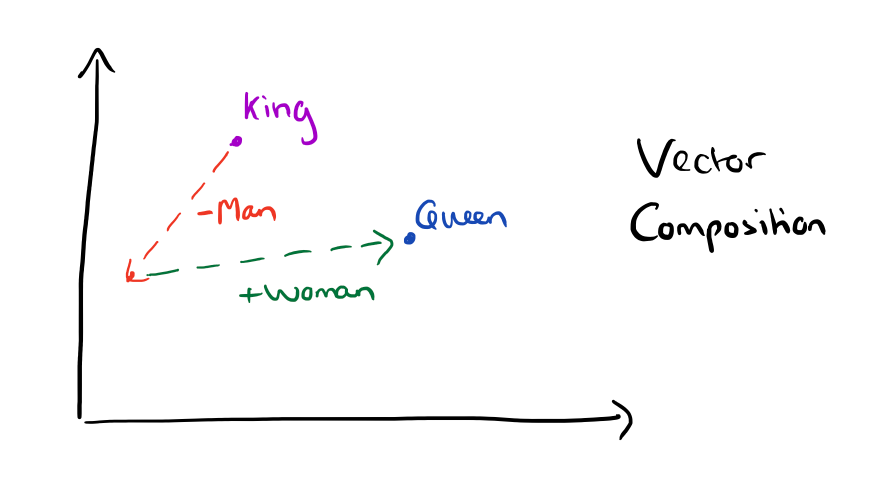

#### TASK 3.2
With the word embeddings we can now calculate analogies. Implement a Function to calculate the analogy between a source and a target and generate the fitting analogy to a given word utilizing the vector composition.

For the function use:
1. `source` -> the first word for the given analogy.
2. `target` -> the second word for the given analogy.
3. `to_this`-> the first word to generate the analogy to.
4. dsm -> the embedding
5. return the word that fits for the given analogy to the word `to_this`

In [80]:
def analogy(source, target, to_this, dsm=dsm_glove):
    """
    What is the analogy:

    What is `to_this` as `source` is to `target`.
    """

    ### IMPLEMENT YOUR SOLUTION HERE ###

    # word, _ = dsm.most_similar(positive=[target, to_this], negative=[source], topn=1)[0]

    source_vec = dsm[source]
    target_vec = dsm[target]
    to_this_vec = dsm[to_this]

    result_vector = target_vec - source_vec + to_this_vec
    result_vector = result_vector / np.linalg.norm(result_vector)

    all_vectors = np.array([dsm[word] for word in dsm.key_to_index])
    all_vectors = all_vectors / np.linalg.norm(all_vectors, axis=1, keepdims=True)
    similarities = cosine_similarity([result_vector], all_vectors).flatten()
    words = list(dsm.key_to_index.keys())

    word = None
    best_score = -1
    for i, word_ in enumerate(words):
        if word_ not in {source, target, to_this}:
            if similarities[i] > best_score:
                best_score = similarities[i]
                word = word_


    return word




In [81]:
analogy("japan", "japanese", "australia")
# expected: "australian"

'australian'

In [82]:
analogy("germany", "beer", "france")
# expected "wine"

'wine'

In [83]:
analogy("austria", "beer", "france")

'wine'

In [84]:
analogy("australia", "beer", "france")

'champagne'

In [85]:
analogy("obama", "clinton", "reagan")

'nixon'

In [86]:
analogy("tall", "tallest", "long")

'longest'

In [87]:
analogy("good", "fantastic", "bad")

'terrible'

We can also calculate the word that does not fit in a row of words by the distance of the embeddings.

In [88]:

print(dsm_glove.doesnt_match("breakfast cereal dinner lunch".split()))

print(dsm_glove.doesnt_match("paris bregenz berlin london".split()))

cereal
bregenz


# Plotting the model

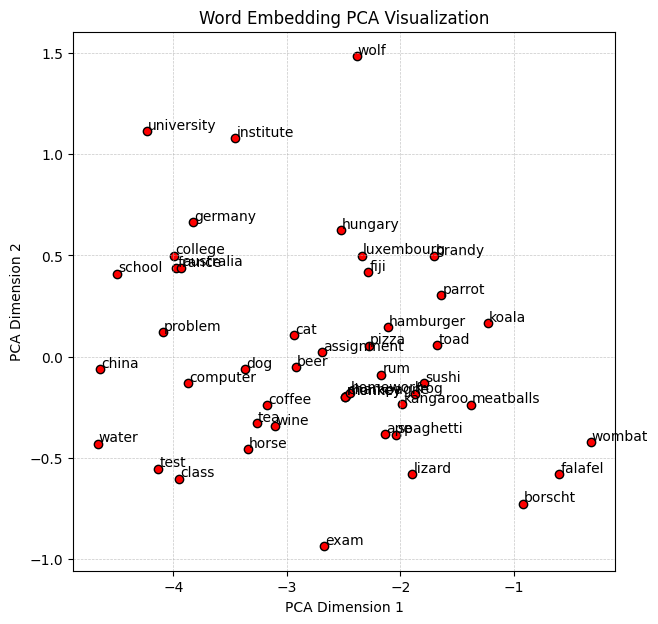

In [89]:
display_pca_scatterplot(
    dsm_glove,
    [
        "coffee",
        "tea",
        "beer",
        "wine",
        "brandy",
        "rum",
        "champagne",
        "water",
        "spaghetti",
        "borscht",
        "computer",
        "hamburger",
        "pizza",
        "falafel",
        "sushi",
        "meatballs",
        "dog",
        "horse",
        "cat",
        "monkey",
        "parrot",
        "koala",
        "lizard",
        "frog",
        "toad",
        "monkey",
        "ape",
        "kangaroo",
        "wombat",
        "wolf",
        "france",
        "germany",
        "hungary",
        "luxembourg",
        "australia",
        "fiji",
        "china",
        "homework",
        "assignment",
        "problem",
        "exam",
        "test",
        "class",
        "school",
        "college",
        "university",
        "institute",
    ],
)

We can also observe the full 2D PCA representation of the vocabulary of the model and compare it to the shakespear and lovecroft embeddings:

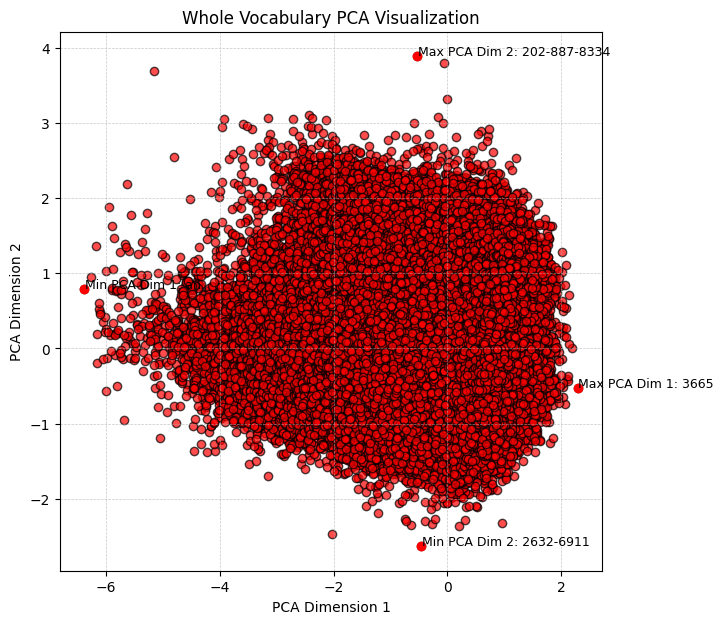

In [90]:
plot_whole_vocab_2d_pca(dsm_glove)